![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/PySpark/7.PySpark_Clustering.ipynb)

# **PySpark Tutorial-7 Clustering**

# **Overview**

In this notebook, clustering is performed for the iris dataset using PySpark.

### **Clustering**

Clustering is an unsupervised learning technique, in short, you are working on data, without having any information about a target attribute or a dependent variable. The general idea of clustering is to find some intrinsic structure in the data, often referred to as groups of similar objects. The algorithm studies the data to identify these patterns or groups such that each member in a group is closer to another member in the group (lower intracluster distance) and farther from another member in a different group (higher inter-cluster distance).

[article](https://towardsdatascience.com/k-means-clustering-using-pyspark-on-big-data-6214beacdc8b#:~:text=K%2Dmeans%20is%20one%20of,The%20KMeans%20function%20from%20pyspark.)

[spark](https://spark.apache.org/docs/latest/ml-clustering.html)

[scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)

###  **Install Spark**



In [ ]:
!pip install -q pyspark==3.2.0

### **Importing Libraries**

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('cluster').getOrCreate()

In [ ]:
from pyspark.ml.clustering import KMeans

### **Download Data and Read**

In [ ]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/PySpark/data/iris.csv

In [ ]:
dataset = spark.read.csv("iris.csv",header=True,inferSchema=True)

### **EDA**

In [ ]:
dataset.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
|         5.4|        3.7|         1.5|        0.2| setosa|
|         4.8|        3.4|         1.6|        0.2| setosa|
|         4.8|        3.0|         1.4|        0.1| setosa|
|         4.3|        3.0|         1.1| 

In [ ]:
dataset.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    max|               7.9|                4.4|               6.9|               2.5|virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [ ]:
dataset2 = dataset.select("sepal_length", "sepal_width", "petal_length", "petal_width")

In [ ]:
dataset2.show()

+------------+-----------+------------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|
+------------+-----------+------------+-----------+
|         5.1|        3.5|         1.4|        0.2|
|         4.9|        3.0|         1.4|        0.2|
|         4.7|        3.2|         1.3|        0.2|
|         4.6|        3.1|         1.5|        0.2|
|         5.0|        3.6|         1.4|        0.2|
|         5.4|        3.9|         1.7|        0.4|
|         4.6|        3.4|         1.4|        0.3|
|         5.0|        3.4|         1.5|        0.2|
|         4.4|        2.9|         1.4|        0.2|
|         4.9|        3.1|         1.5|        0.1|
|         5.4|        3.7|         1.5|        0.2|
|         4.8|        3.4|         1.6|        0.2|
|         4.8|        3.0|         1.4|        0.1|
|         4.3|        3.0|         1.1|        0.1|
|         5.8|        4.0|         1.2|        0.2|
|         5.7|        4.4|         1.5|        0.4|
|         5.

In [ ]:
new = dataset.select("sepal_length", "sepal_width", "petal_length", "petal_width", "species").toPandas()

In [ ]:
new.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


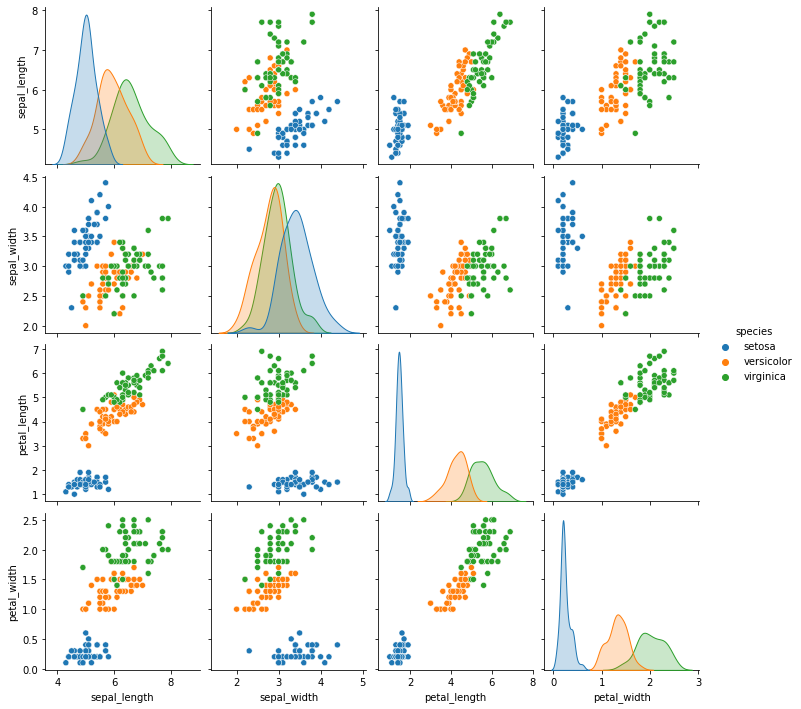

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(new, hue="species")
plt.show()

### **Import Libraries and Make Clustering**

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
dataset2.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
vec_assembler = VectorAssembler(inputCols = dataset2.columns, outputCol='features')

In [ ]:
final_data = vec_assembler.transform(dataset2)

In [ ]:
from pyspark.ml.feature import StandardScaler

In [ ]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [ ]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(final_data)

In [ ]:
# Normalize each feature to have unit standard deviation.
final_data_output = scalerModel.transform(final_data)

In [ ]:
final_data_output.show(2)

+------------+-----------+------------+-----------+-----------------+--------------------+
|sepal_length|sepal_width|petal_length|petal_width|         features|      scaledFeatures|
+------------+-----------+------------+-----------+-----------------+--------------------+
|         5.1|        3.5|         1.4|        0.2|[5.1,3.5,1.4,0.2]|[6.15892840883878...|
|         4.9|        3.0|         1.4|        0.2|[4.9,3.0,1.4,0.2]|[5.9174018045706,...|
+------------+-----------+------------+-----------+-----------------+--------------------+
only showing top 2 rows



K-means is one of the most commonly used clustering algorithms for grouping data into a predefined number of clusters. The spark.mllib includes a parallelized variant of the k-means++ method called kmeans||. The KMeans function from pyspark.ml.clustering includes the following parameters:

* **k** is the number of clusters specified by the user

* **maxIterations** is the maximum number of iterations before the clustering algorithm stops. Note that if the intracluster distance doesn’t change beyond the epsilon value mentioned, the iteration will stop irrespective of max iterations

* **initializationMode** specifies either random initialization of centroids or initialization via k-means|| (similar to K-means ++)

* **epsilon** determines the distance threshold within which k-means is expected to converge

* **initialModel** is an optional set of cluster centroids that the user can provide as an input. If this parameter is used, the algorithm just runs once to allocate points to its nearest centroid

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator


silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='scaledFeatures', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='scaledFeatures', k=i)
    
    KMeans_fit=KMeans_algo.fit(final_data_output)
    
    output=KMeans_fit.transform(final_data_output)
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.7730700433791338
Silhouette Score: 0.6507398108479315
Silhouette Score: 0.589318804648323
Silhouette Score: 0.5209117205853686
Silhouette Score: 0.5156249579677015
Silhouette Score: 0.47999177185469366
Silhouette Score: 0.4779957348788271
Silhouette Score: 0.5243059648175254


Text(0, 0.5, 'cost')

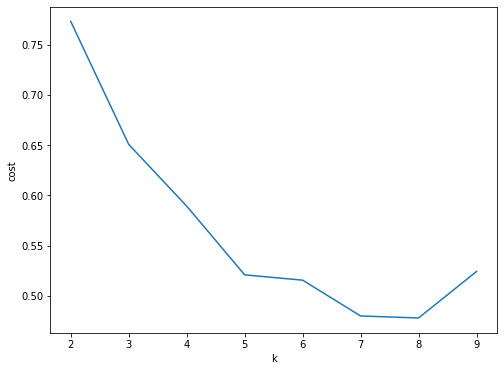

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel("k")
ax.set_ylabel("cost")

In [ ]:
# Trains a k-means model.

KMeans1=KMeans(featuresCol='scaledFeatures', k=3)
    
KMeans_fit=KMeans1.fit(final_data_output)
    

In [ ]:
# Shows the result.
centers = KMeans_fit.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[7.00655008 6.13395667 2.47539551 1.85402481]
[6.0454109  7.86479734 0.82818867 0.32273398]
[8.18877966 7.10251008 3.12164721 2.5875662 ]


In [ ]:
KMeans_fit.transform(final_data_output).select('prediction').show()

+----------+
|prediction|
+----------+
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
+----------+
only showing top 20 rows



In [ ]:
KMeans_fit.transform(final_data_output).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   50|
|         2|   47|
|         0|   53|
+----------+-----+



In [ ]:
result = KMeans_fit.transform(final_data_output).select('prediction')

In [ ]:
new_result = dataset.join(result)

In [ ]:
new_result.show()

+------------+-----------+------------+-----------+-------+----------+
|sepal_length|sepal_width|petal_length|petal_width|species|prediction|
+------------+-----------+------------+-----------+-------+----------+
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|         5.1|        3.5|         1.4|        0.2| setosa|         1|
|     

In [ ]:
new_res = new_result.toPandas()

In [ ]:
new_res.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,prediction
3279,5.1,3.7,1.5,0.4,setosa,2
13039,6.7,3.1,4.7,1.5,versicolor,2
21038,6.7,3.1,5.6,2.4,virginica,1
3770,5.0,3.0,1.6,0.2,setosa,1
6225,4.5,2.3,1.3,0.3,setosa,2
4001,5.0,3.4,1.6,0.4,setosa,0
3984,5.0,3.4,1.6,0.4,setosa,0
2342,5.7,4.4,1.5,0.4,setosa,0
8864,5.2,2.7,3.9,1.4,versicolor,1
13526,5.5,2.6,4.4,1.2,versicolor,1
